In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt



from scipy.stats import linregress

### a) Download the same day high frequency historical data for ‘BTC’ and ‘ETH’ by using yfinance. (It can be any day between 1st Dec 2022 and 31st Dec 2022, make sure you have the same length of the data. Set interval to ‘1 minute’.) And show the figures. (10 marks)

In [2]:
BTC = yf.download('BTC-USD', start='2022-12-25', end='2022-12-26',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [3]:
ETH = yf.download('ETH-USD', start='2022-12-25', end='2022-12-26',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [4]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-25 00:00:00+00:00,16847.505859,16847.505859,16847.505859,16847.505859,16847.505859,0
2022-12-25 00:01:00+00:00,16846.718750,16846.718750,16846.718750,16846.718750,16846.718750,0
2022-12-25 00:02:00+00:00,16846.701172,16846.701172,16846.701172,16846.701172,16846.701172,0
2022-12-25 00:03:00+00:00,16846.535156,16846.535156,16846.535156,16846.535156,16846.535156,0
2022-12-25 00:04:00+00:00,16847.066406,16847.066406,16847.066406,16847.066406,16847.066406,0
...,...,...,...,...,...,...
2022-12-25 23:55:00+00:00,16838.541016,16838.541016,16838.541016,16838.541016,16838.541016,0
2022-12-25 23:56:00+00:00,16838.750000,16838.750000,16838.750000,16838.750000,16838.750000,612352
2022-12-25 23:57:00+00:00,16839.273438,16839.273438,16839.273438,16839.273438,16839.273438,1966080


In [5]:
ETH

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-25 00:00:00+00:00,1221.171509,1221.171509,1221.171509,1221.171509,1221.171509,0
2022-12-25 00:01:00+00:00,1221.078735,1221.078735,1221.078735,1221.078735,1221.078735,0
2022-12-25 00:02:00+00:00,1221.049316,1221.049316,1221.049316,1221.049316,1221.049316,0
2022-12-25 00:03:00+00:00,1221.162964,1221.162964,1221.162964,1221.162964,1221.162964,0
2022-12-25 00:04:00+00:00,1221.225464,1221.225464,1221.225464,1221.225464,1221.225464,0
...,...,...,...,...,...,...
2022-12-25 23:55:00+00:00,1218.551880,1218.551880,1218.551880,1218.551880,1218.551880,0
2022-12-25 23:56:00+00:00,1218.557129,1218.557129,1218.557129,1218.557129,1218.557129,143616
2022-12-25 23:57:00+00:00,1218.628662,1218.628662,1218.628662,1218.628662,1218.628662,912128


In [6]:
print(BTC.shape)

(1438, 6)


In [7]:
print(ETH.shape)

(1438, 6)


### b) Assume the δ=1, estimate the parameter ρ . (10 marks)

In [8]:
S1_0 = BTC['Open'][0]
S2_0 = ETH['Open'][0]

In [9]:
S1_0

16847.505859375

In [10]:
S2_0

1221.1715087890625

In [11]:
lr1 = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1))
lr2 = np.log(ETH['Adj Close'] / ETH['Adj Close'].shift(1))
mu_1 = lr1.mean() * 390
mu_2 = lr2.mean() * 390
sigma_1 = lr1.std() * np.sqrt(390)
sigma_2 = lr2.std() * np.sqrt(390)
rho = lr1.corr(lr2)
z_0 = 0.00
gamma = 0.2
delta = 1
T = 1
M = 390

In [12]:
print(mu_1)

-8.468055799255824e-05


In [30]:
rho

0.7991633768413203

In [13]:
result = linregress(np.log(BTC['Adj Close']), np.log(ETH['Adj Close']))
beta = result.slope

In [14]:
beta

2.9966912668348047

In [16]:
# S1_0 and S2_0 are the starting points

#mu_1 = average of daily return
#sigma_1 = daily volatility 
# rho = correlation coefficient 
# z_0 = starting point for cointegrating factor process
# M = 390 minutes
# T = 1 day
# gamma = risk averse factor, 0.5  means risk seeking
# delta = - alpha
# phi =



'S1_0 = 40\nS2_0 = 20\nmu_1 = 0.01\nmu_2 = 0.02\nsigma_1 = 0.05\nsigma_2 = 0.1\nrho = -0.7\nz_0 = 0.01\nbeta = 1\ngamma = 0.5\ndelta = 0.8\nT = 1\nM = 390'

In [17]:
# Parameters
# dt = T/M
# S1 & S2 = stock price process
# z =  cointegration factor
# a =  # b =  # c =  are the final solution parameters
# Pi_1 = optimal weights
# Pi_2 = optimal weights



dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [19]:
# The following is a loop to simulate S1 and S2


tt = np.linspace(0, 1, M + 1) #Time and intervals. 0 to 1 = from 0 to t = 1 is 1 days with M + 1 intervals
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0 # starting points of the process 
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = BTC['Adj Close'][t-1]
    S2[t] = ETH['Adj Close'][t-1]

Text(0.5, 1.0, 'Stock Price')

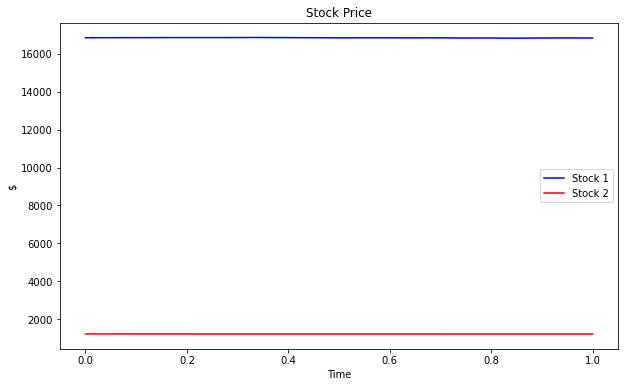

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='Stock 1')
plt.plot(tt, S2, 'r', lw=1.5, label='Stock 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

Text(0.5, 1.0, 'z')

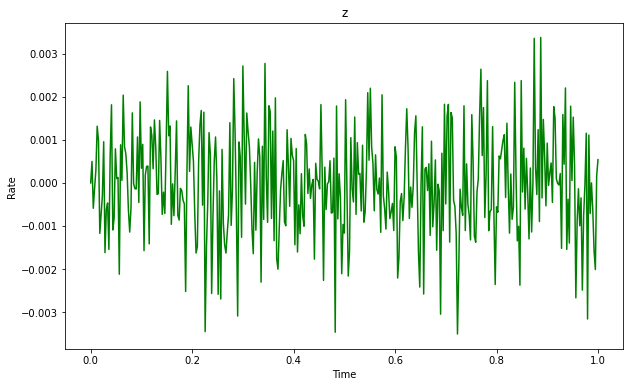

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [22]:
#This solves for the optimal parameters and weights for our value function/solution

for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

In [23]:
a[t]

array([0.])

### Optimal Weights

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

In [ ]:
plt.figure(figsize=(10, 6))
#plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

### Optimal Wealth Process - Negative means selling and you get cash

Text(0.5, 1.0, 'Wealth')

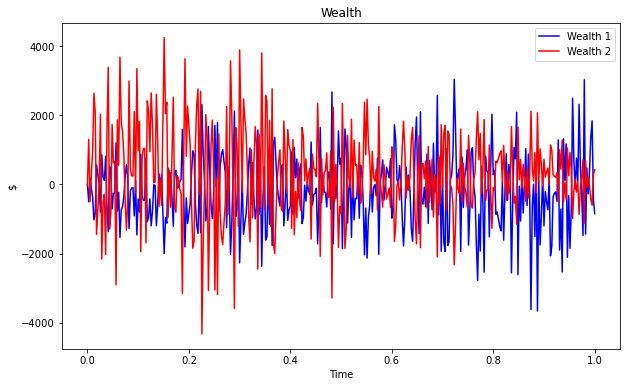

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(tt, -Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, -Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [25]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

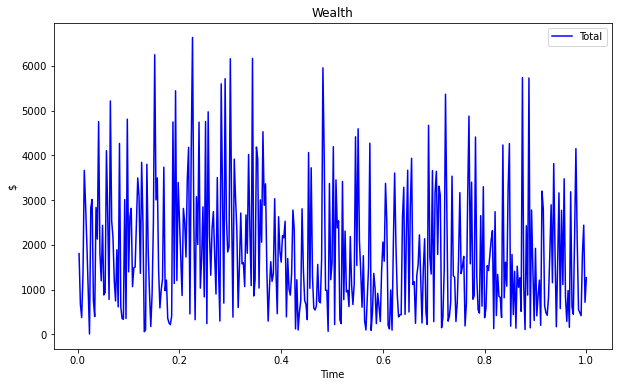

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

Inital Wealth

In [27]:
Wealth[1]

array([1804.27770143])

Ending Wealth

In [28]:
Wealth[-1]

array([1267.56171238])

Return

In [29]:
# Daily return

(Wealth[-1] - Wealth[1])/Wealth[1]

array([-0.29746862])

In [ ]:
# This provides the static weight for Pi_1 of the static control pair
Pi_1.mean()

In [ ]:
# This provides the static weight for Pi_2 of the static control pair
Pi_2.mean()

In [ ]:
# Plot the dynamic control and static control for the wealth process for a comparison

plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic') #Gives wealth process with dynamic control pair
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static') #Gives wealth process with static control pair
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison') 